# Exploritory Data Analysis

In [303]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth=300


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

import seaborn as sns

In [346]:
sns.set_palette('cividis')

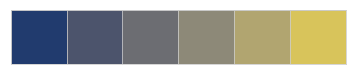

In [347]:
sns.palplot(sns.color_palette())

In [133]:
sns.set_style('whitegrid')

In [348]:
colors = ['C1', 'm', 'C5']
colors_r = ['m', 'C1', 'C5']

---

In [148]:
df = pd.read_csv('application_train.csv')
df.rename(str.lower, axis='columns', inplace=True)
df['age'] = df.days_birth/-365
df['days_employed'].replace(365243, value=np.nan, inplace = True)
df['employed'] = df.days_employed/-365
df['credit_coverage'] = df.amt_credit/df.amt_income_total
df['dscr'] = df.amt_annuity/df.amt_income_total
df['term'] = df.amt_credit/df.amt_annuity

In [324]:
target_name = ['fine', 'late']

In [212]:
df.head(3)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age,employed,credit_coverage,dscr,term
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,2.007889,0.121978,16.461104
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,4.790750,0.132217,36.234085
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5

In [308]:
df.select_dtypes('object').columns.to_list()

['name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

([<matplotlib.patches.Wedge at 0x1a2da33a20>,
 [Text(-1.0648123216659293, 0.2759976804765098, ''),
  Text(1.0648123152057372, -0.27599770540024077, '')])

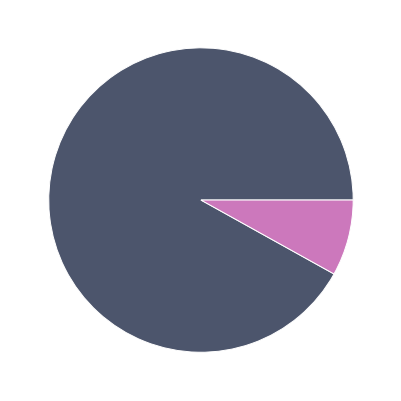

In [349]:
df_parts = df.target.value_counts()
plt.figure(figsize = (7,7))
plt.pie(df_parts, colors=colors)

Text(0, 0.5, 'Frequency')

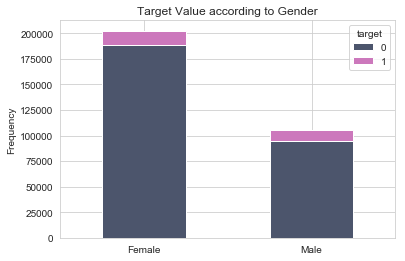

In [275]:
gender = pd.crosstab(df.code_gender, df.target)
gender.set_index(pd.Index(['Female', 'Male', 'XNA']), inplace=True)
gender.iloc[0:2].plot(kind='bar', stacked=True, color=colors, rot=360)
plt.title('Target Value according to Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage')

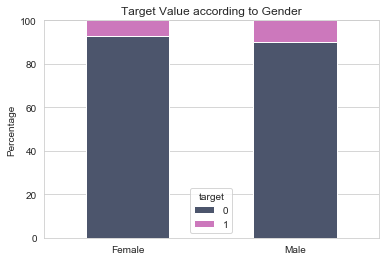

In [296]:
props = df.groupby('code_gender')['target'].value_counts(normalize=True).unstack()
props = props*100
props.set_index(pd.Index(['Female', 'Male', 'XNA']), inplace=True)
props.iloc[0:2].plot(kind='bar', stacked='True', color=colors, rot=360, ylim=(0,100))
plt.title('Target Value according to Gender')
plt.ylabel('Percentage')

Text(0, 0.5, 'Frequency')

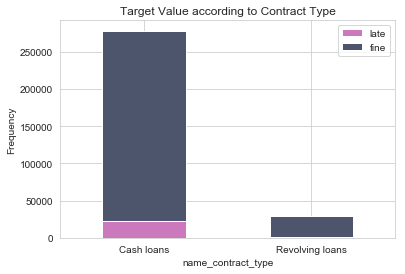

In [332]:
props = pd.crosstab(df.name_contract_type, df.target)
props.columns = target_name
props = props[['late', 'fine']]
props.plot(kind='bar', stacked=True, color=colors_r, rot=360)
plt.title('Target Value according to Contract Type')
plt.ylabel('Frequency')

target,0,1
name_contract_type,,
Cash loans,255011,23221
Revolving loans,27675,1604


<Figure size 792x432 with 0 Axes>

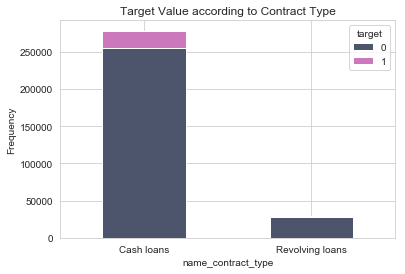

In [314]:
plt.figure(figsize = (11,6))
props = pd.crosstab(df.name_contract_type, df.target)
props.plot(kind='bar', stacked=True, color=colors, rot=360)
plt.title('Target Value according to Contract Type')
plt.ylabel('Frequency')
props

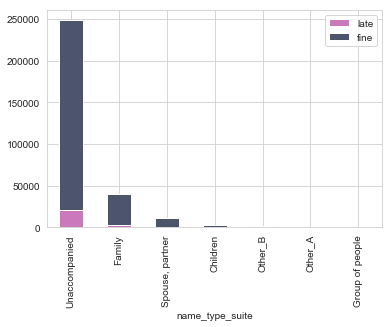

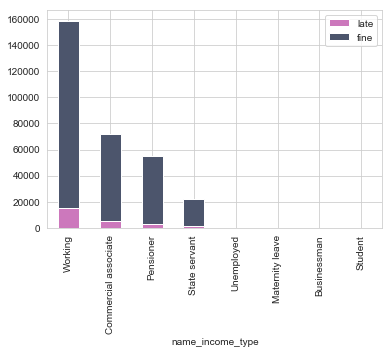

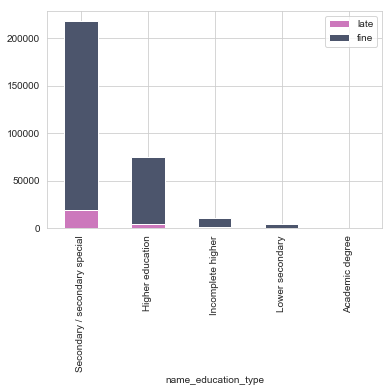

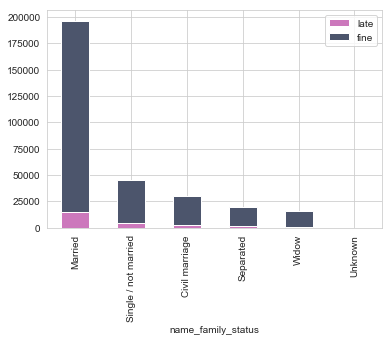

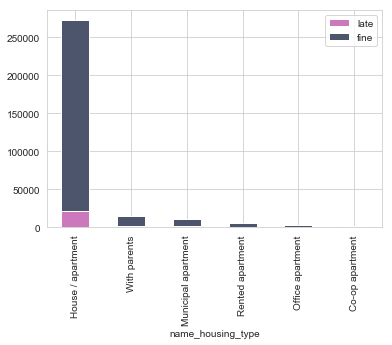

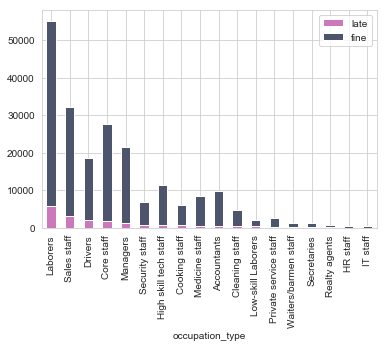

In [337]:
objects = ['name_type_suite', 'name_income_type', 'name_education_type',
 'name_family_status', 'name_housing_type', 'occupation_type']
for i in objects:
    props = pd.crosstab(df[i], df.target)
    props.columns = target_name
    props = props[['late', 'fine']].sort_values('late', ascending=False)
    plt.show(props.plot(kind='bar', stacked=True, color=colors_r))

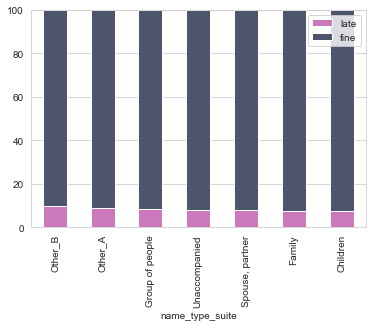

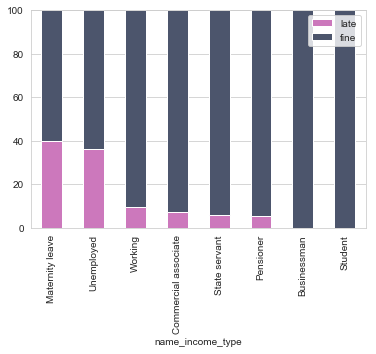

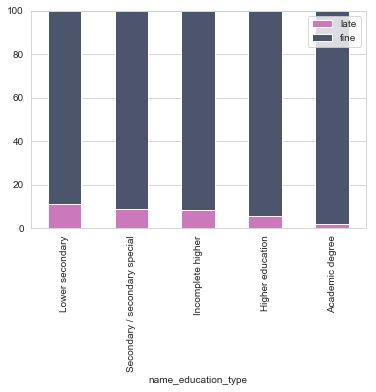

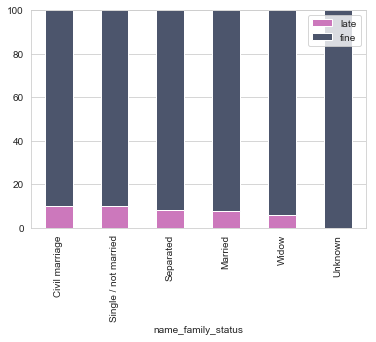

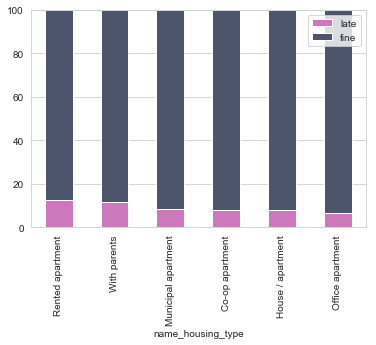

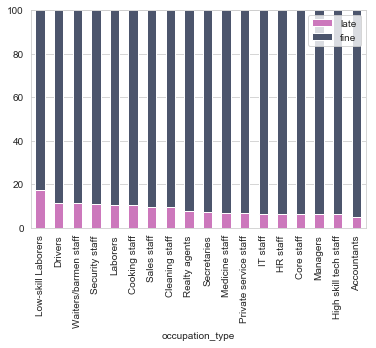

In [342]:
objects = ['name_type_suite', 'name_income_type', 'name_education_type',
 'name_family_status', 'name_housing_type', 'occupation_type']
for i in objects:
    props = df.groupby(i)['target'].value_counts(normalize=True).unstack()
    props = props*100
    props.columns = target_name
    props = props[['late', 'fine']].sort_values('late', ascending=False)
    plt.show(props.plot(kind='bar', stacked='True', color=colors_r, ylim=(0,100)))

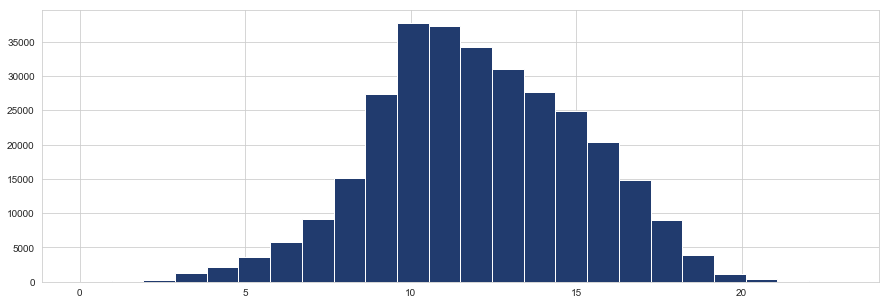

In [352]:
plt.figure(figsize=(15,5))
df.hour_appr_process_start.hist(bins=24)

In [344]:
df.hour_appr_process_start.describe()

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: hour_appr_process_start, dtype: float64

Text(0, 0.5, 'Density')

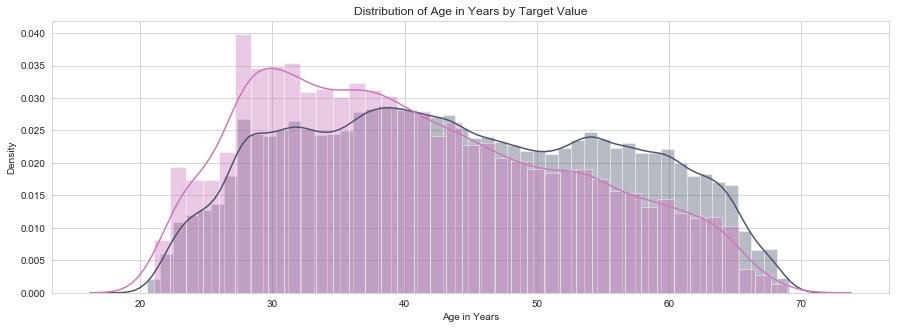

In [209]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['target']==0]['age'], label = 'target: 0', color=colors[0])
sns.distplot(df[df['target']==1]['age'], label = 'target: 1', color=colors[1])
plt.title('Distribution of Age in Years by Target Value')
plt.xlabel('Age in Years')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

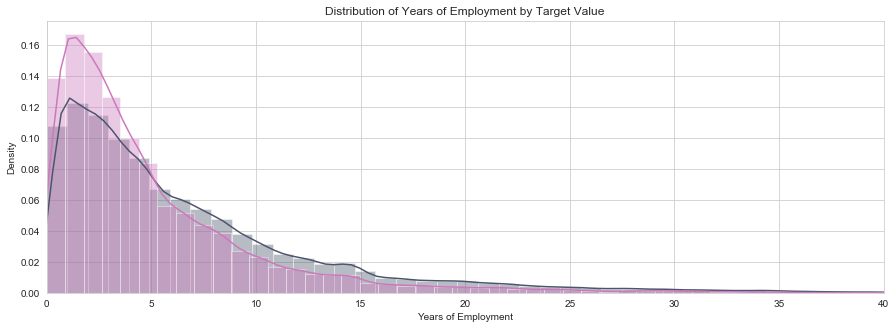

In [210]:
df1 = df.dropna(subset=['employed'])
plt.figure(figsize=(15,5))
sns.distplot(df1[df1['target']==0]['employed'], label = 'target: 0', color=colors[0])
sns.distplot(df1[df1['target']==1]['employed'], label = 'target: 1', color=colors[1])
plt.xlim(0,40)
plt.title('Distribution of Years of Employment by Target Value')
plt.xlabel('Years of Employment')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

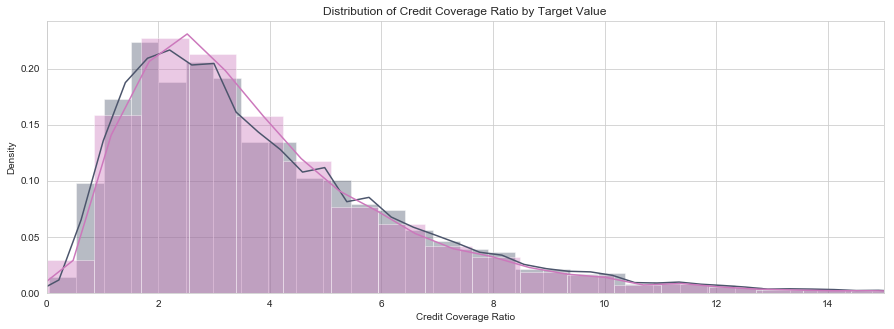

In [211]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['target']==0]['credit_coverage'], label = 'target: 0', color=colors[0], bins=100)
sns.distplot(df[df['target']==1]['credit_coverage'], label = 'target: 1', color=colors[1], bins=100)
plt.xlim(0,15)
plt.title('Distribution of Credit Coverage Ratio by Target Value')
plt.xlabel('Credit Coverage Ratio')
plt.ylabel('Density')